In [2]:
%matplotlib inline
import numpy as np
import pandas as pd
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score

In [3]:
# train model using the amazon data. 

amazon = pd.read_csv('amazon.txt', delimiter='\t', header=None)
amazon.columns = ['message', 'positive']

#standardize to lowercase
amazon.message = amazon.message.apply(lambda x: str(x).lower())

In [4]:
amazon[amazon['positive'] == 1].head()

,message,positive
1,"good case, excellent value.",1
2,great for the jawbone.,1
4,the mic is great.,1
7,if you are razr owner...you must have this!,1
10,and the sound quality is great.,1


In [5]:
keywords = ['great', 'good', 'excellent', 'love', 'like','liked','quality'
           ,'awesome', 'enjoy', 'impressed', 'satisfied', 'well', 'recommend',
           'sweet', 'sweetest', 'secure', 'best', 'easy', 'winner', 'comfortable',
           'impressive', 'inexpensive', 'beautiful', 'pretty', 'nice', 'funny',
           'value', 'ideal', 'happy']

In [6]:
for key in keywords:
    amazon[str(key)] = amazon.message.str.contains(str(key), case=False)

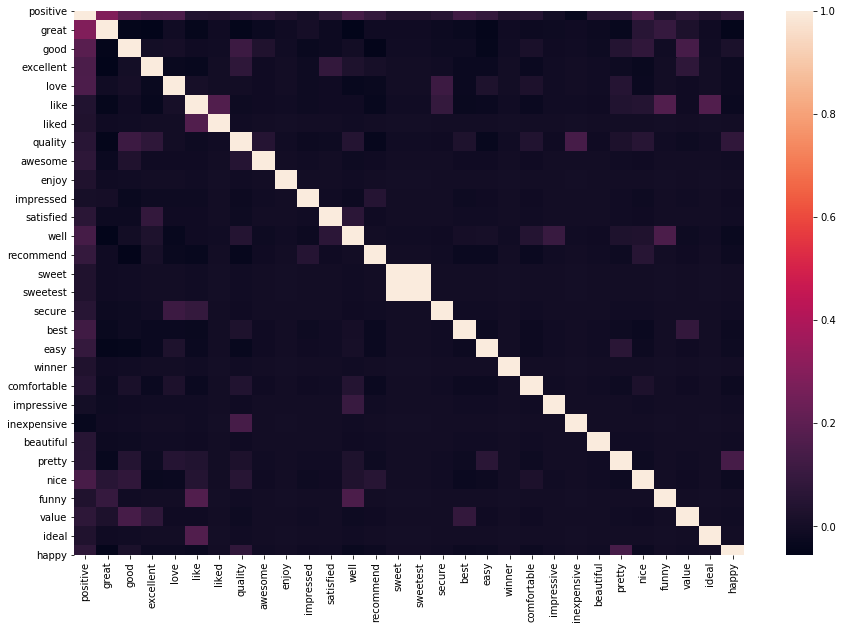

In [7]:
plt.subplots(figsize=(15,10))
sns.heatmap(amazon.corr())
plt.show()

In [8]:
# We don't have a lot of correlation so that is perfect. Many times in positive reviews
# there will be multiple positive words in the same sentence. 

In [9]:
data = amazon[keywords]
target = amazon['positive']

# data is boolean so we are going to use BernoulliNB
from sklearn.naive_bayes import BernoulliNB
# rename to shorter
bern = BernoulliNB()

# fit model to data
bern.fit(data, target)

# classify prediction and store as new variable
amazon['predicted'] = bern.predict(data)

# display results and accuracy
print('Number of mislabeled  points out of a total {} points: {}'.format(len(data),
                                                                        (target != amazon.predicted).sum()))
print('Model accuracy (training data): ', accuracy_score(amazon.positive,
                                                        amazon.predicted))

Number of mislabeled  points out of a total 1000 points: 238
Model accuracy (training data):  0.762


In [11]:
# look at misclassified statements to add more keywords
amazon[amazon['positive'] != amazon['predicted']].message.head()

# iterate and increase keywords

7           if you are razr owner...you must have this!
11    he was very impressed when going from the orig...
23    i have yet to run this new battery below two b...
45                       it has all the features i want
52    a usable keyboard actually turns a pda into a ...
Name: message, dtype: object

In [15]:
# test on yelp data
# import data 
yelp = pd.read_csv('yelp.txt', delimiter = '\t', header=None)
yelp.columns = ['message', 'positive']

# standardize case
yelp['message'] = yelp['message'].apply(lambda x: str(x).lower())

# write loop to check for keywords in yelp messages, populate data input
for key in keywords:
    yelp[str(key)] = yelp.message.str.contains(str(key), case=False)
    
# specify training input from
yelp_data = yelp[keywords]
yelp_target = yelp['positive']

# predict and store as new variable
yelp['prediction'] = bern.predict(yelp_data)

# display results and accuracy
print('Number of mislabeled point out of a total {} points: {}'.format(len(yelp_target),
                                                                      (yelp_target != yelp.prediction).sum()))
print('Model accuracyon yelp data: ', accuracy_score(yelp.positive, yelp.prediction))

Number of mislabeled point out of a total 1000 points: 318
Model accuracyon yelp data:  0.682


In [17]:
# test on imdb data

# import data
imdb = pd.read_csv('imdb.txt', delimiter='\t', header=None)
imdb.columns = ['message', 'positive']

#standardize case before running test
imdb['message'] = imdb['message'].apply(lambda x: str(x).lower())

#write loop to check for keywords in imdb message, populate data input
for key in keywords:
    imdb[str(key)] = imdb.message.str.contains(str(key), case=False)

#specify training input from 
imdb_data = imdb[keywords]
imdb_target = imdb['positive']

#predict and store as new variable
imdb['prediction'] = bern.predict(imdb_data)

#display results and accuracy
print('Number of mislabeld points out of a total {} points: {}'.format(len(imdb_target), (imdb_target != imdb.prediction).sum()))
print('Model accuracy on yelp data: ', accuracy_score(imdb.positive, imdb.prediction))

Number of mislabeld points out of a total 748 points: 290
Model accuracy on yelp data:  0.6122994652406417


## Conclusion of Generalized Classification 

We have successfully performed sentiment analysis on three seperate feedback databases for Amazon, Yelpm and IMBD. We can see that the classifier that we built had varying rates of success for each database. Considering that each company performs different kinds of business it might be the case that depending on the company, customers use different words to describe positive and negative feedback. This is especially true when comparing them to IMDB which is used for movie reviews where differents phrases are used to described positive or negative feedback. 

To test this hypothesis we will specifically look at the IMDB feedback and try and perform a more case specific sentiment analysis to see if we can get a better result using words more often used to  describe movie reviews. 
